In [1]:
import pandas as pd

#Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

#Modelo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib
import os

from sklearn.model_selection import GridSearchCV

#Metricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('../data/train_test/anxiety_train.csv')

In [3]:
X = data.drop(columns='Anxiety_Group')

y = data['Anxiety_Group']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=55)

In [5]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [6]:
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)

In [7]:
print("Accuracy KNN:", acc_knn)

Accuracy KNN: 0.7807149294082307


In [8]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1684
           1       0.77      0.79      0.78      1645

    accuracy                           0.78      3329
   macro avg       0.78      0.78      0.78      3329
weighted avg       0.78      0.78      0.78      3329



In [9]:
cm = confusion_matrix(y_test, y_pred)


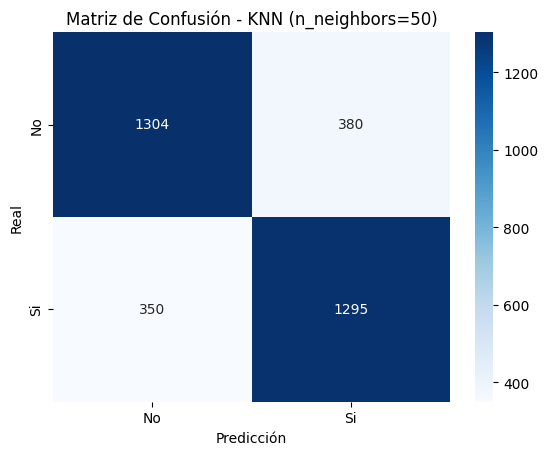

In [10]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Si"],
            yticklabels=["No","Si"])
plt.title("Matriz de Confusión - KNN (n_neighbors=50)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Grid Search

In [11]:
param_grid = { 'n_neighbors' : [1, 2, 3, 5]}

In [12]:
grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)

In [13]:
grid.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,2


In [14]:
pred = grid.predict(X_test)

In [15]:
print("Mejor accuracy CV:", grid.best_score_)
print("Mejores parámetros:", grid.best_params_)

Mejor accuracy CV: 0.9129553135561397
Mejores parámetros: {'n_neighbors': 2}


In [16]:
results = pd.DataFrame(grid.cv_results_)
results = results[[
    'param_n_neighbors',
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'    ]]

print(results.sort_values(by='rank_test_score'))

   param_n_neighbors  mean_test_score  std_test_score  rank_test_score
1                  2         0.912955        0.005211                1
0                  1         0.896583        0.006304                2
2                  3         0.870522        0.007501                3
3                  5         0.853023        0.005324                4


In [17]:
results['param_n_neighbors'] = results['param_n_neighbors'].astype(int)

In [18]:
grouped = results.groupby('param_n_neighbors')['mean_test_score'].mean()

In [19]:
'''plt.figure(figsize=(8,6))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-')
plt.title("Accuracy medio vs n_neighbors (KNN)")
plt.xlabel("Número de vecinos (n_neighbors)")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()'''

'plt.figure(figsize=(8,6))\nplt.plot(grouped.index, grouped.values, marker=\'o\', linestyle=\'-\')\nplt.title("Accuracy medio vs n_neighbors (KNN)")\nplt.xlabel("Número de vecinos (n_neighbors)")\nplt.ylabel("Mean CV Accuracy")\nplt.grid(True)\nplt.show()'

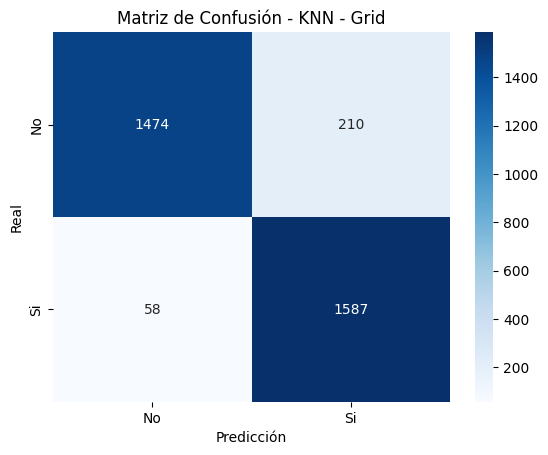

In [20]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Si"],
            yticklabels=["No","Si"])
plt.title("Matriz de Confusión - KNN - Grid")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [21]:
models = '../models'
best_model = grid.best_estimator_
final_model_path = os.path.join(models, 'modelo_knn.pkl')
joblib.dump(best_model, final_model_path)
print(f"Modelo final guardado en: {final_model_path}")

Modelo final guardado en: ../models\modelo_knn.pkl
